# Imports

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

# Laden der Daten

In [213]:
data = pd.read_csv('Car details v3.csv')
data.head()

# split engine column and take the first value
data['engine'] = data['engine'].str.split(' ').str[0]
# split mileage column and take the first value
data['mileage'] = data['mileage'].str.split(' ').str[0]
# split max_power column and take the first value
data['max_power'] = data['max_power'].str.split(' ').str[0]
#drop name and torque column
data.drop(['name', 'torque'], axis=1, inplace=True)



In [214]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


# Datacleaning

In [215]:
# convert mileage, engine and max_power to float
data['mileage'] = pd.to_numeric(data['mileage'], errors='coerce') 
data['engine'] = pd.to_numeric(data['engine'], errors='coerce')
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')

# convert fuel column to numeric
data['fuel'] = data['fuel'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})

# convert seller_type column to numeric
data['seller_type'] = data['seller_type'].map({'Individual': 0, 'Dealer': 1})

# convert transmission column to numeric
data['transmission'] = data['transmission'].map({'Manual': 0, 'Automatic': 1})

# convert owner column to numeric
data['owner'] = data['owner'].map({'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4})

data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,0.0,0,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,1,0.0,0,1,21.14,1498.0,103.52,5.0
2,2006,158000,140000,0,0.0,0,2,17.70,1497.0,78.00,5.0
3,2010,225000,127000,1,0.0,0,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,0,0.0,0,0,16.10,1298.0,88.20,5.0


In [216]:
# fill NAN values with mean
data['mileage'].fillna(data['mileage'].mean(), inplace=True)
data['engine'].fillna(data['engine'].mean(), inplace=True)
data['max_power'].fillna(data['max_power'].mean(), inplace=True)
data['seller_type'].fillna(data['seller_type'].mean(), inplace=True)
data['seats'].fillna(data['seats'].mean(), inplace=True)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int64  
 4   seller_type    8128 non-null   float64
 5   transmission   8128 non-null   int64  
 6   owner          8128 non-null   int64  
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  seats          8128 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 698.6 KB


In [218]:
y = data['selling_price']
import numpy as np
y = np.log(y)
X = data.drop('selling_price', axis=1)

# Scalen der Daten

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.048464,1.338363,0.803014,-0.414001,-0.385158,-0.640403,0.999896,-0.423804,-0.495682,-0.440324
1,0.048464,0.887411,0.803014,-0.414001,-0.385158,0.745063,0.432289,0.079227,0.339607,-0.440324
2,-1.929775,1.241098,-1.062880,-0.414001,-0.385158,2.130528,-0.431678,0.077215,-0.382499,-0.440324
3,-0.940656,1.011202,0.803014,-0.414001,-0.385158,-0.640403,0.899435,-0.126009,-0.042951,-0.440324
4,-1.682495,0.887411,-1.062880,-0.414001,-0.385158,-0.640403,-0.833524,-0.323198,-0.093883,-0.440324


# Daten splitten in Test und Train

In [220]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
x_train = torch.tensor(x_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test= torch.tensor(y_test.values, dtype=torch.float)

In [222]:
x_train.shape

torch.Size([6502, 10])

# Modell bauen

In [229]:
class MySimpleNN(torch.nn.Module):

    def __init__(self, input_size=10, hidden_size=(10,20,10), output_size=1):

        super(MySimpleNN, self).__init__()
            
        self.fc1 = torch.nn.Linear(input_size, 10)
        self.fc2 = torch.nn.Linear(hidden_size[0],hidden_size[1] )
        self.fc3 = torch.nn.Linear(hidden_size[1], hidden_size[2])
        self.fc4 = torch.nn.Linear(hidden_size[2], output_size)

        self.bn1 = torch.nn.BatchNorm1d(hidden_size[0])
        self.bn2 = torch.nn.BatchNorm1d(hidden_size[1])
        self.bn3 = torch.nn.BatchNorm1d(hidden_size[2])

        
    def forward(self, xb):
        #print("xb.shape: ", xb.shape)
        z2 = self.fc1(xb)
        #print("z2.shape: ", z2.shape)
        a2 = torch.relu(z2)
        #print("a2.shape: ", "a2.shape")
        a2_bn = self.bn1(a2)
        #print("a2_bn.shape: ", "a2_bn.shape")

        z3 = self.fc2(a2_bn)
        #print("z3.shape: ", "z3.shape")
        a3 = torch.relu(z3)
        #print("a3.shape: ", "a3.shape")
        a3_bn = self.bn2(a3)
        #print("a3_bn.shape: ", "a3_bn.shape")

        z4 = self.fc3(a3_bn)
        #print("z4.shape: ", "z4.shape")
        a4 = torch.relu(z4)
        #print("a4.shape: ", "a4.shape")
        a4_bn = self.bn3(a4)
        #print("a4_bn.shape: ", "a4_bn.shape")

        y_hat = torch.relu(self.fc4(a4_bn))
        #print("y_hat.shape: ", "y_hat.shape")

        return y_hat

In [230]:
def get_batch(x,y, batch_size):
    for i in range(0, len(x), batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]

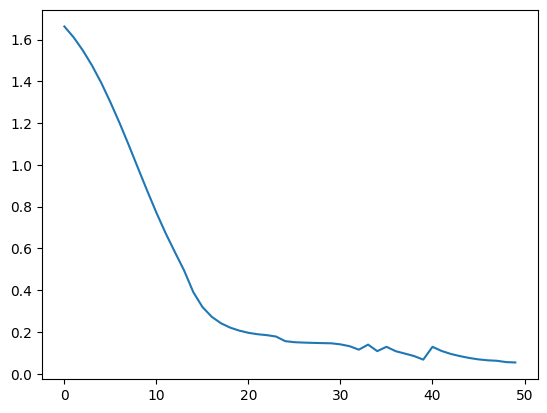

In [244]:
model = MySimpleNN(input_size=10, hidden_size=(10,20,10), output_size=1)
lr=0.0001
batch_size = 100

loss_fn = torch.nn.MSELoss()

def train(xb, yb):
    y_hat = model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
        model.zero_grad()
    return loss.item()

losses=[]
for epoch in range(50):
    loss_sum=0
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    losses.append(loss_sum/len(x_train))

import matplotlib.pyplot as plt
plt.plot(losses)

# Auswertung

In [245]:
errorSum = 0
for xb, yb in get_batch(x_test, y_test, batch_size):
    y_hat = model(xb)
    for i in range(len(yb)):
        errorSum += abs(yb[i] - y_hat[i])

print("mean absolute error: ", errorSum/len(x_test))

mean absolute error:  tensor([1.2989], grad_fn=<DivBackward0>)


In [246]:
y_hat = model(x_test[:10])
y = y_test[:10]
print("y_hat: ", y_hat, "y: ", y)

y_hat:  tensor([[11.0861],
        [ 1.1829],
        [13.6878],
        [14.1685],
        [13.5905],
        [13.1526],
        [13.4844],
        [ 7.0906],
        [13.2018],
        [14.0598]], grad_fn=<ReluBackward0>) y:  tensor([12.1960, 13.1224, 12.9598, 11.9184, 13.1712, 11.9829, 13.0170, 13.2534,
        12.0436, 11.8130])
